In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
import gym
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
import json
import numpy as np

Using TensorFlow backend.


### Agent and Environment Description

* observation:  
    (Cart Position ,  Cart Velocity ,  Pole Angle ,  Pole Velocity At Tip)
 
* Actions:  
    0 Push cart to the left; 1 Push cart to the right

* Reward:  
    Reward is for every step taken ,  including the termination step

* Starting State:  
    All observations are assigned a uniform random value between +-0.05

* Episode Termination:  
    Pole Angle is more than ±12°
    Cart Position is more than ± 2.4 
    (center of the cart reaches the edge of the display)
    Episode length is greater than 200

* reference:  
    http:  //neuro-educator.com/rl1/


In [2]:
env = gym.make('CartPole-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [68]:
model = Sequential()
# input: (n x 4) ( Cart Position, Cart Vel, Pole Angle, Pole Vel)
model.add(Flatten(input_shape=(1, env.observation_space.shape[0])))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))

# output: (n x 3) (left, no, right)
model.add(Dense(env.action_space.n))
model.add(Activation('linear'))

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_9 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_10 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_11 (Activation)   (None, 16)                0         
__________

In [70]:
# memory replay
memory = SequentialMemory(limit=50000, window_length=1)

# epsilon greedy algorithm
policy = EpsGreedyQPolicy(eps=0.001)

dqn = DQNAgent(model=model, nb_actions=env.action_space.n, gamma=0.99, memory=memory,
              nb_steps_warmup=10, target_model_update=1e-2, policy=policy)

In [ ]:
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=100000, visualize=False, verbose=2)

Training for 100000 steps ...


/home/syuntoku14/.pyenv/versions/anaconda3-5.1.0/envs/coursera/lib/python3.6/site-packages/rl/memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   141/100000: episode: 1, duration: 1.329s, episode steps: 141, steps per second: 106, episode reward: 141.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.496 [0.000, 1.000], mean observation: 0.118 [-0.627, 0.709], loss: 0.175437, mean_absolute_error: 0.412029, mean_q: 0.655545
   200/100000: episode: 2, duration: 0.139s, episode steps: 59, steps per second: 423, episode reward: 59.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.475 [0.000, 1.000], mean observation: -0.100 [-0.746, 0.248], loss: 0.019771, mean_absolute_error: 0.600869, mean_q: 1.502709
   262/100000: episode: 3, duration: 0.160s, episode steps: 62, steps per second: 387, episode reward: 62.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.001 [-0.860, 0.357], loss: 0.015196, mean_absolute_error: 0.884652, mean_q: 1.923544
   291/100000: episode: 4, duration: 0.064s, episode steps: 29, steps per second: 454, episode reward: 29.000, mean reward: 1.000 [1.000, 1

   749/100000: episode: 32, duration: 0.046s, episode steps: 9, steps per second: 194, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.222 [0.000, 1.000], mean observation: 0.123 [-1.209, 1.815], loss: 0.283052, mean_absolute_error: 3.096834, mean_q: 6.037265
   758/100000: episode: 33, duration: 0.023s, episode steps: 9, steps per second: 383, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.222 [0.000, 1.000], mean observation: 0.146 [-1.136, 1.916], loss: 0.473171, mean_absolute_error: 3.142061, mean_q: 5.984330
   768/100000: episode: 34, duration: 0.024s, episode steps: 10, steps per second: 421, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.200 [0.000, 1.000], mean observation: 0.128 [-1.350, 2.137], loss: 0.402748, mean_absolute_error: 3.182236, mean_q: 6.166202
   777/100000: episode: 35, duration: 0.021s, episode steps: 9, steps per second: 425, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000]

  1986/100000: episode: 61, duration: 0.328s, episode steps: 147, steps per second: 448, episode reward: 147.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.463 [0.000, 1.000], mean observation: -0.322 [-1.960, 0.345], loss: 0.594766, mean_absolute_error: 7.157436, mean_q: 14.390363
  2099/100000: episode: 62, duration: 0.366s, episode steps: 113, steps per second: 309, episode reward: 113.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.451 [0.000, 1.000], mean observation: -0.335 [-2.047, 0.308], loss: 0.636369, mean_absolute_error: 7.618752, mean_q: 15.343749
  2233/100000: episode: 63, duration: 0.651s, episode steps: 134, steps per second: 206, episode reward: 134.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.463 [0.000, 1.000], mean observation: -0.368 [-1.884, 0.328], loss: 0.572585, mean_absolute_error: 8.075066, mean_q: 16.271688
  2368/100000: episode: 64, duration: 0.308s, episode steps: 135, steps per second: 439, episode reward: 135.000, mean reward: 

  6218/100000: episode: 90, duration: 0.343s, episode steps: 139, steps per second: 406, episode reward: 139.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.460 [0.000, 1.000], mean observation: -0.314 [-2.025, 0.277], loss: 0.426225, mean_absolute_error: 18.209860, mean_q: 37.432968
  6340/100000: episode: 91, duration: 0.293s, episode steps: 122, steps per second: 416, episode reward: 122.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.459 [0.000, 1.000], mean observation: -0.365 [-1.833, 0.349], loss: 0.466377, mean_absolute_error: 18.513510, mean_q: 38.006458
  6477/100000: episode: 92, duration: 0.299s, episode steps: 137, steps per second: 458, episode reward: 137.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.460 [0.000, 1.000], mean observation: -0.350 [-1.954, 0.318], loss: 0.814401, mean_absolute_error: 18.672670, mean_q: 38.293419
  6677/100000: episode: 93, duration: 0.780s, episode steps: 200, steps per second: 257, episode reward: 200.000, mean rewar

 10190/100000: episode: 118, duration: 0.362s, episode steps: 136, steps per second: 375, episode reward: 136.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.456 [0.000, 1.000], mean observation: -0.388 [-2.158, 0.294], loss: 0.668896, mean_absolute_error: 22.953077, mean_q: 47.008106
 10318/100000: episode: 119, duration: 0.343s, episode steps: 128, steps per second: 373, episode reward: 128.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.453 [0.000, 1.000], mean observation: -0.387 [-2.193, 0.343], loss: 0.530298, mean_absolute_error: 22.970858, mean_q: 47.062469
 10476/100000: episode: 120, duration: 0.363s, episode steps: 158, steps per second: 435, episode reward: 158.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.462 [0.000, 1.000], mean observation: -0.329 [-2.165, 0.325], loss: 0.646032, mean_absolute_error: 23.374964, mean_q: 47.897354
 10639/100000: episode: 121, duration: 0.435s, episode steps: 163, steps per second: 374, episode reward: 163.000, mean r

 14555/100000: episode: 146, duration: 0.308s, episode steps: 131, steps per second: 426, episode reward: 131.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.458 [0.000, 1.000], mean observation: -0.327 [-1.999, 0.289], loss: 0.927416, mean_absolute_error: 25.894117, mean_q: 52.936279
 14700/100000: episode: 147, duration: 0.313s, episode steps: 145, steps per second: 464, episode reward: 145.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.462 [0.000, 1.000], mean observation: -0.316 [-1.973, 0.287], loss: 0.385359, mean_absolute_error: 25.539463, mean_q: 52.252735
 14838/100000: episode: 148, duration: 0.297s, episode steps: 138, steps per second: 465, episode reward: 138.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.464 [0.000, 1.000], mean observation: -0.323 [-1.792, 0.324], loss: 0.366012, mean_absolute_error: 26.013453, mean_q: 53.160610
 14965/100000: episode: 149, duration: 0.356s, episode steps: 127, steps per second: 357, episode reward: 127.000, mean r

 19073/100000: episode: 174, duration: 0.438s, episode steps: 191, steps per second: 436, episode reward: 191.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.440 [0.000, 1.000], mean observation: -0.292 [-4.315, 3.102], loss: 0.322283, mean_absolute_error: 26.429720, mean_q: 53.775871
 19273/100000: episode: 175, duration: 0.436s, episode steps: 200, steps per second: 458, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.076 [-0.408, 0.421], loss: 0.501130, mean_absolute_error: 26.493887, mean_q: 53.803467
 19420/100000: episode: 176, duration: 0.345s, episode steps: 147, steps per second: 426, episode reward: 147.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.422 [0.000, 1.000], mean observation: -0.365 [-4.283, 3.130], loss: 1.263686, mean_absolute_error: 26.689672, mean_q: 54.162323
 19620/100000: episode: 177, duration: 0.430s, episode steps: 200, steps per second: 465, episode reward: 200.000, mean re

In [43]:
with open('cartpole_history.json', 'w') as f:
    json.dump(history.history, f)

dqn.save_weights('cartpole_dqn.hdf5')

[WARNING] cartpole_dqn.hdf5 already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True!


### Results

In [52]:
env = gym.make('CartPole-v0')
dqn.load_weights('cartpole_dqn.hdf5')
dqn.test(env, nb_episodes=5, visualize=True)
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


In [53]:
y = None
with open('cartpole_history.json', 'r') as f:
    y = json.load(f)

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

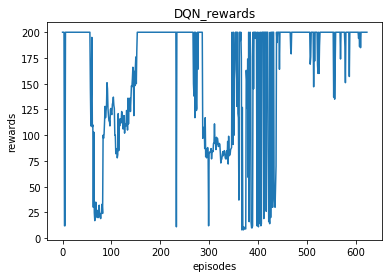

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('DQN_rewards')
ax.set_xlabel('episodes')
ax.set_ylabel('rewards')
episode_reward = np.array(y['episode_reward'])
ax.plot(episode_reward)
plt.savefig('CartPole_DQN_rewards')
plt.show()

In [56]:
len(episode_reward)

624

In [61]:
# 1) Avg. reward over the last 100 consecutive episodes
print('Avg. reward: ', np.mean(episode_reward[100:]))

Avg. reward:  163.116412214


In [62]:
# 2) How many episodes before you encounter 100 consecutive episodes
b4 = False
count = 0
max_continuous = 0
for idx, reward in enumerate(episode_reward > 150):
    count = count + 1 if b4 and reward else 0
    max_continuous = max(max_continuous, count)
    b4 = reward

In [63]:
max_continuous  # It doesn't reaches 100

80

### 3) any other informatoins
* The reward for every episodes
* DQN network summery

Are shown abeve.

In [68]:
model = Sequential()
# input: (n x 4) ( Cart Position, Cart Vel, Pole Angle, Pole Vel)
model.add(Flatten(input_shape=(1, env.observation_space.shape[0])))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))

# output: (n x 3) (left, no, right)
model.add(Dense(env.action_space.n))
model.add(Activation('linear'))

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_9 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_10 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_11 (Activation)   (None, 16)                0         
__________